In [1]:
import boto3
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline

In [2]:
dynamodb = boto3.resource('dynamodb', region_name='ap-northeast-1')
table = dynamodb.Table('dynamodb-env-keisuke-nakata')
ret = table.scan()
df = pd.DataFrame(data=ret['Items'])
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d %H:%M:%S')

In [3]:
df.head()

,date,ambient,co2_ndir,co2_pas,humidity,address,voc,temperature,dust,room,pir
0,2021-11-01 12:53:27,430,5000,586,43.5333251953125,85:a5:ca:78:5c:a4,86,26.430206298828125,0,NaN,NaN
1,2021-11-01 12:54:06,430,5000,586,43.5333251953125,85:a5:ca:78:5c:a4,87,26.430206298828125,0,NaN,NaN
2,2021-11-01 12:54:38,444,5000,586,43.5333251953125,85:a5:ca:78:5c:a4,98,26.430206298828125,0,NaN,NaN
3,2021-11-01 12:55:11,444,5000,586,43.5333251953125,85:a5:ca:78:5c:a4,93,26.430206298828125,0,NaN,NaN
4,2021-11-01 12:55:43,463,5000,586,43.5333251953125,85:a5:ca:78:5c:a4,94,26.430206298828125,0,NaN,NaN


In [4]:
def show_graph(df):
    plt.figure(figsize=(24, 12))

    plt.subplot(7,1,1)
    plt.title('ambient', fontsize=14)
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%H")) 
    plt.ylim(-10, 600)
    plt.plot(df['date'], df['ambient'])

    plt.subplot(7,1,2)
    plt.title('pir', fontsize=14)
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%H")) 
    plt.ylim(20, 40)
    plt.plot(df['date'], df['pir'])    
    
    plt.subplot(7,1,3)
    plt.title('temperature', fontsize=14)
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%H")) 
    plt.ylim(15, 30)
    plt.plot(df['date'], df['temperature'])
    
    plt.subplot(7,1,4)
    plt.title('humidity', fontsize=14)
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%H")) 
    plt.ylim(0, 100)
    plt.plot(df['date'], df['humidity'])    
    

    plt.figure(figsize=(24, 16))    
    
    plt.subplot(7,1,5)
    plt.title('co2', fontsize=14)
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%H")) 
    plt.ylim(200, 1600)
    plt.plot(df['date'], df['co2_pas'], label='co2(pas)')
    plt.plot(df['date'], df['co2_ndir'], label='co2(ndir)')
    plt.axhline(1000, ls = "-.", color = "magenta")    
    y = 1000
    
    plt.legend()
    
    plt.subplot(7,1,6)
    plt.title('voc', fontsize=14)
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%H")) 
    plt.ylim(0, 500)
    plt.plot(df['date'], df['voc'])
    plt.axhline(400, ls = "-.", color = "magenta")
    
    plt.subplot(7,1,7)
    plt.title('pm2.5', fontsize=14)
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%H")) 
    plt.ylim(0, 1)
    plt.plot(df['date'], df['dust'])

# 隔離部屋(仕事部屋)

In [5]:
df_work = df[df['room'] == 'work']
df_work = df_work[(df_work['date'] >= '2021-11-05 00:00:00') & (df_work['date'] < '2021-11-06 00:00:00')]
df_work.head()

,date,ambient,co2_ndir,co2_pas,humidity,address,voc,temperature,dust,room,pir
3433,2021-11-05 00:00:33,0,844,1077,43.9727783203125,85:a5:ca:78:5c:a4,102,23.439483642578125,0.4842553472524476,work,28
3434,2021-11-05 00:01:51,0,837,1082,43.9910888671875,85:a5:ca:78:5c:a4,101,23.415451049804688,0.4890975590812689,work,28
3435,2021-11-05 00:03:10,0,836,1080,44.02618408203125,85:a5:ca:78:5c:a4,100,23.41278076171875,0.4825573185765275,work,28
3436,2021-11-05 00:04:28,0,839,1081,44.0093994140625,85:a5:ca:78:5c:a4,100,23.359375,0.467073598394325,work,27
3437,2021-11-05 00:05:46,0,844,1081,44.091796875,85:a5:ca:78:5c:a4,101,23.404769897460938,0.4905318377902057,work,27


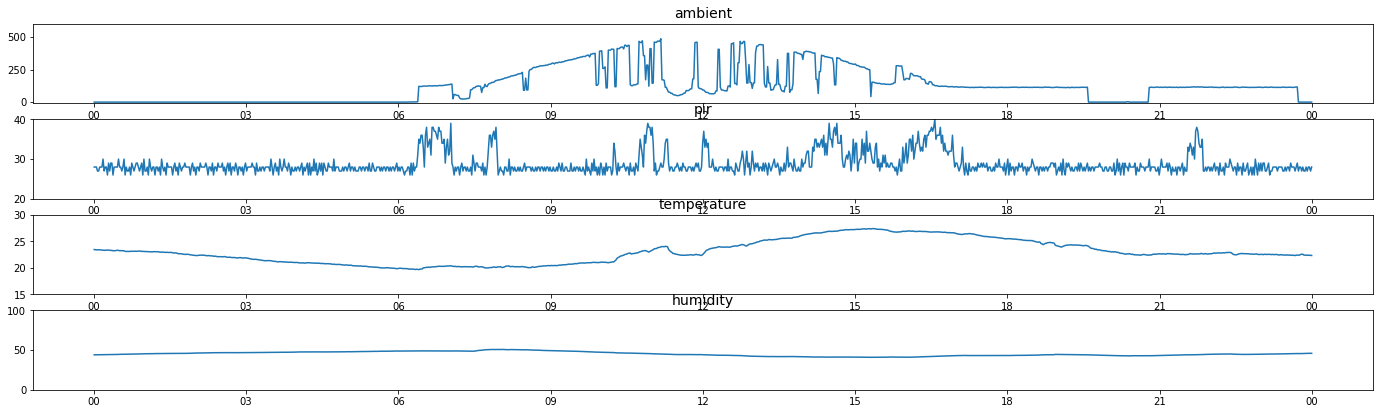

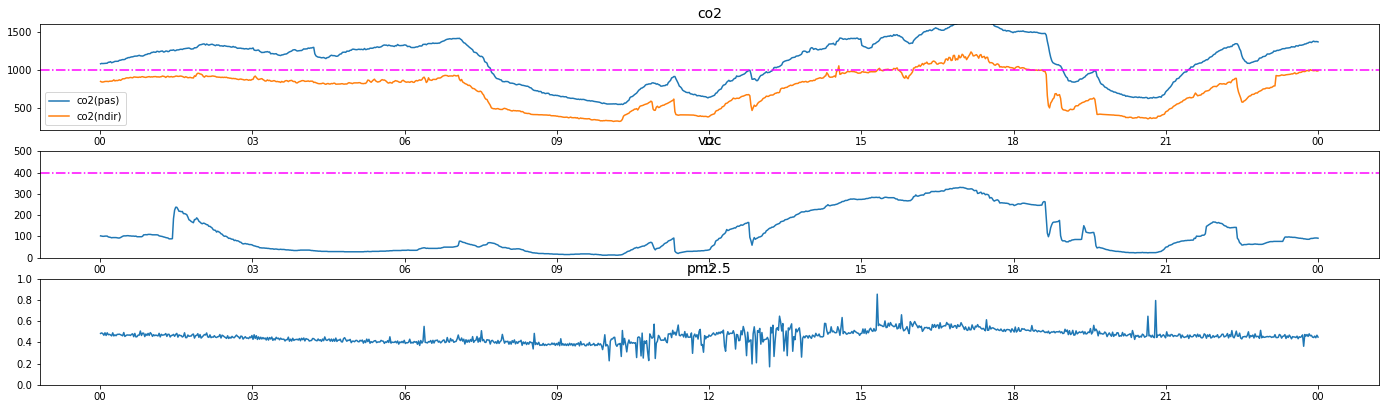

In [6]:
show_graph(df_work)

# リビング

In [7]:
df_living = df[df['room'] == 'living']
df_living = df_living[(df_living['date'] >= '2021-11-07 00:00:00') & (df_living['date'] < '2021-11-08 00:00:00')]
df_living.head()

,date,ambient,co2_ndir,co2_pas,humidity,address,voc,temperature,dust,room,pir
5549,2021-11-07 00:01:08,0,398,675,44.7113037109375,85:a5:ca:78:5c:a4,21,20.296554565429688,0.39158006487197405,living,28
5550,2021-11-07 00:02:26,0,400,673,44.76318359375,85:a5:ca:78:5c:a4,21,20.253829956054688,0.4315630623669791,living,27
5551,2021-11-07 00:03:44,0,400,674,44.74639892578125,85:a5:ca:78:5c:a4,21,20.22979736328125,0.3892605966962817,living,28
5552,2021-11-07 00:05:02,0,396,678,44.7784423828125,85:a5:ca:78:5c:a4,21,20.235137939453125,0.4036042718625189,living,28
5553,2021-11-07 00:06:21,0,400,669,44.879150390625,85:a5:ca:78:5c:a4,21,20.221786499023438,0.39046790990120944,living,27


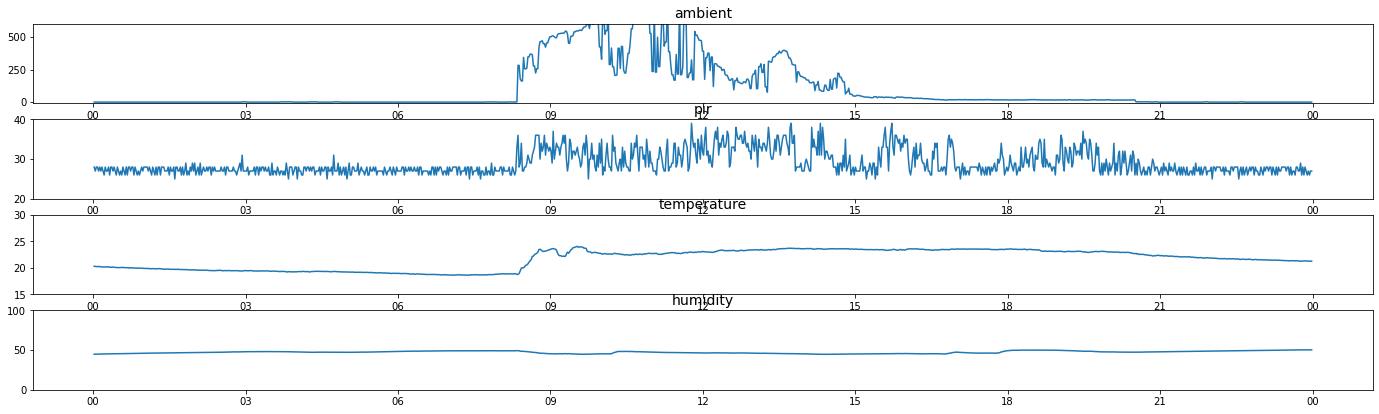

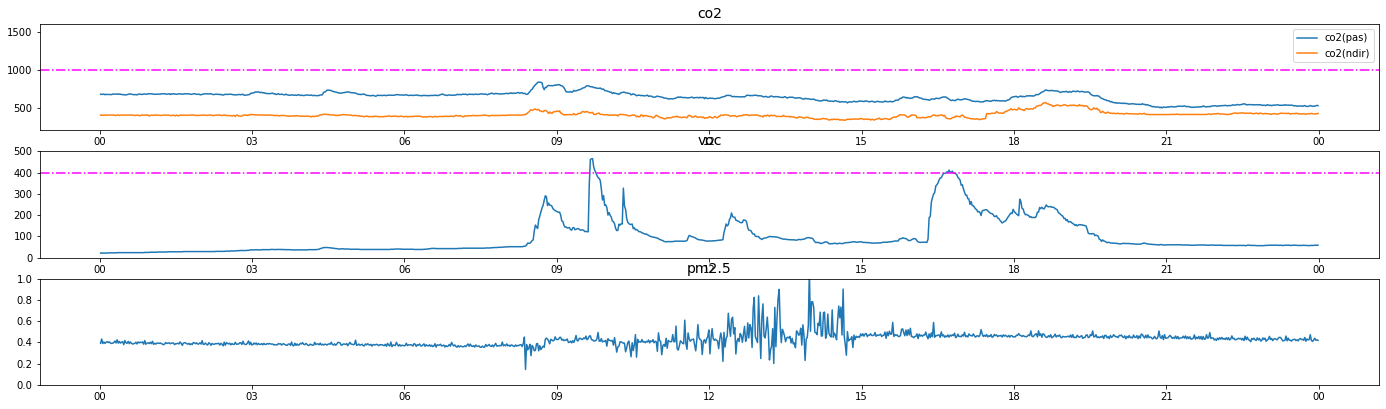

In [8]:
show_graph(df_living)

# トイレ

In [9]:
df_bath = df[df['room'] == 'bathroom']
df_bath = df_bath[(df_bath['date'] >= '2021-11-12 11:20:00') & (df_bath['date'] < '2021-11-13 00:00:00')]
df_bath.head()

,date,ambient,co2_ndir,co2_pas,humidity,address,voc,temperature,dust,room,pir
7071,2021-11-12 11:20:48,0,442,658,51.8890380859375,85:a5:ca:78:5c:a4,163,19.0655517578125,0.41639186831137553,bathroom,26
7072,2021-11-12 11:22:05,0,439,623,51.727294921875,85:a5:ca:78:5c:a4,128,19.044189453125,0.4149279184401963,bathroom,26
7073,2021-11-12 11:23:22,0,433,590,51.51214599609375,85:a5:ca:78:5c:a4,150,19.062881469726562,0.4226487275642905,bathroom,26
7074,2021-11-12 11:24:40,0,424,573,51.06201171875,85:a5:ca:78:5c:a4,144,19.041519165039062,0.41405366011840444,bathroom,27
7075,2021-11-12 11:25:57,0,422,563,50.8819580078125,85:a5:ca:78:5c:a4,135,19.041519165039062,0.4230318751233898,bathroom,26


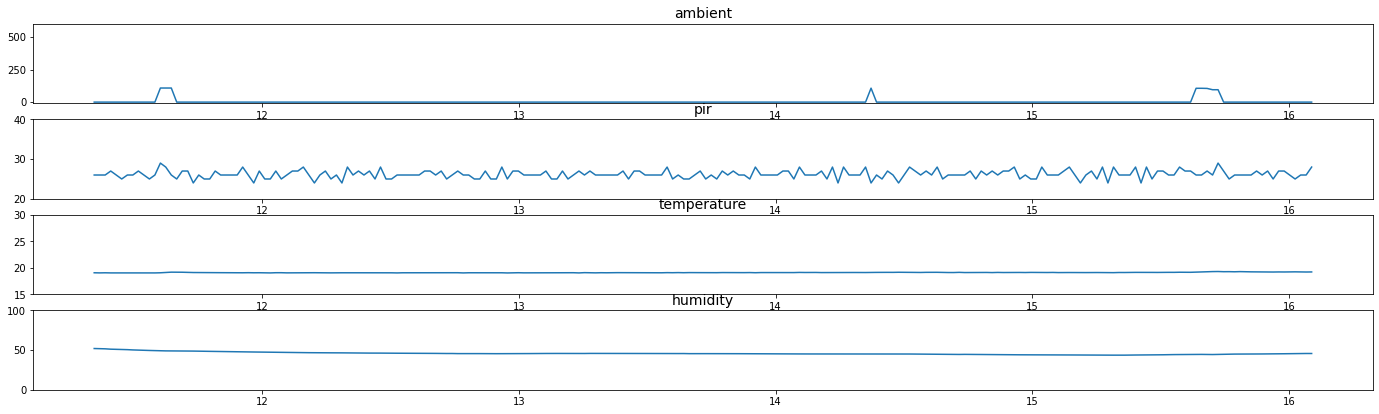

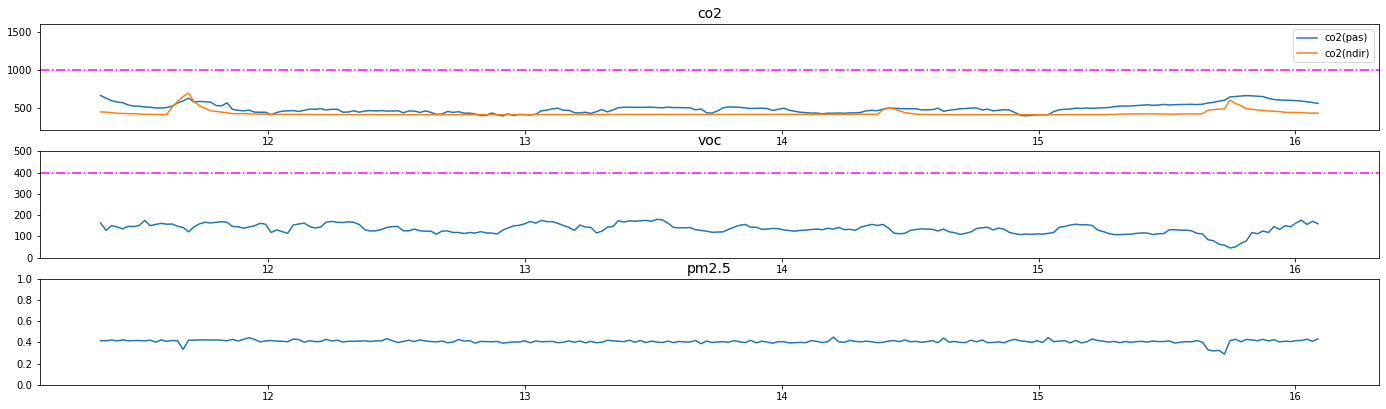

In [10]:
show_graph(df_bath)